In [3]:
pip install opencv-python --break-system-packages -q && python -c "import cv2; print(cv2.__version__)"

4.13.0
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
pip install matplotlib --break-system-packages -q

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread("house.jpg")

In [ ]:
# convert rgb to grayscale
 
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imwrite("step1_grayscale.jpg", gray)
print("Grayscale image saved.")

Step 1 ✔  Grayscale image saved.


In [4]:
# invert the grayscale image
inverted = cv2.bitwise_not(gray)
cv2.imwrite("step2_inverted.jpg", inverted)
print("Inverted image saved.")

Inverted image saved.


In [5]:
# blur the inverted image
# the higher the kernel size, the blurrier the image
blurred = cv2.GaussianBlur(inverted, ksize=(21, 21), sigmaX=0)
cv2.imwrite("step3_blurred_inverted.jpg", blurred)
print("Blurred-inverted image saved.")

Blurred-inverted image saved.


In [6]:
# dodge blend - > pencil sketch
# the higher the value, the darker the sketch
# the lower the value, the lighter the sketch
# the value should be between 0 and 255
# if the value is 255, the sketch will be completely white
# if the value is 0, the sketch will be completely black
# Formula: sketch = gray / (1 - blurred/255)  (color-dodge)
# cv2.divide does this safely: result = gray * 256 / (256 - blurred)

sketch = cv2.divide(gray, 255 - blurred, scale=255.0)
cv2.imwrite("step4_basic_sketch.jpg", sketch)
print("Basic pencil sketch saved.")

Basic pencil sketch saved.


In [ ]:
# Enhance edges with adaptive threshold
# the higher the block size, the thicker the edges
# the lower the block size, the thinner the edges
edges = cv2.adaptiveThreshold(
    gray,
    maxValue=255,
    adaptiveMethod=cv2.ADAPTIVE_THRESH_MEAN_C,
    thresholdType=cv2.THRESH_BINARY,
    blockSize=9,
    C=9,
)
cv2.imwrite("step5_edges.jpg", edges)
print("Edge-enhanced image saved.")

Step 5 ✔  Edge-enhanced image saved.


In [8]:
# combine edges + sketch (RESULT)
final_sketch = cv2.multiply(sketch, edges, scale=1 / 255.0)
cv2.imwrite("step6_final_sketch.jpg", final_sketch)
print("Final enhanced sketch saved.")

Final enhanced sketch saved.


In [9]:
# final image

def to_bgr(img):
    """Ensure image is 3-channel BGR for stacking."""
    return img if len(img.shape) == 3 else cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

H, W = 200, 300   # thumbnail size

steps = [
    ("0. Original",        image),
    ("1. Grayscale",       gray),
    ("2. Inverted",        inverted),
    ("3. Blurred-Inv",     blurred),
    ("4. Basic Sketch",    sketch),
    ("5. Edges",           edges),
    ("6. Final Sketch",    final_sketch),
]

tiles = []
for title, img in steps:
    thumb = cv2.resize(to_bgr(img), (W, H))
    # Add label bar
    bar = np.ones((30, W, 3), dtype=np.uint8) * 40
    cv2.putText(bar, title, (6, 21), cv2.FONT_HERSHEY_SIMPLEX, 0.55, (255, 255, 255), 1)
    tiles.append(np.vstack([bar, thumb]))

# Arrange in two rows: 4 + 3
row1 = np.hstack(tiles[:4])
row2_pad = np.hstack(tiles[4:] + [np.ones_like(tiles[0])])  # pad last row
summary = np.vstack([row1, row2_pad])
cv2.imwrite("summary_all_steps.jpg", summary)
print("\nSummary grid saved  →  summary_all_steps.jpg")
print("\nAll done! 🎨")


Summary grid saved  →  summary_all_steps.jpg

All done! 🎨


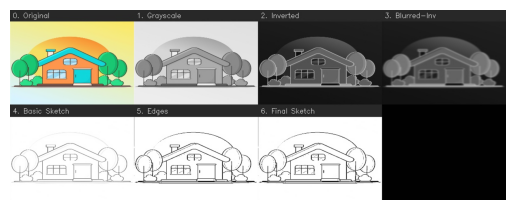

In [4]:
img_res = cv2.imread("summary_all_steps.jpg")
image_rgb = cv2.cvtColor(img_res, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.axis("off")
plt.show()